In [ ]:
# Reading the Feather data
# Feather is just a binary format of the data 

In [1]:
!pip install pyarrow

     ---------------------------------------- 24.8/24.8 MB 1.6 MB/s eta 0:00:00


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_feather(r"E:\Python_dataset\Sales_data.ftr")

In [4]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.shape

(186850, 6)

In [6]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
# Droping the null values
data = data.dropna(how='all')

In [9]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
# lets check the duplicates

data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [12]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [13]:
# Droping the duplicate rows
data = data.drop_duplicates()

In [14]:
data.shape

(185687, 6)

In [15]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
# Analyzing Monthly Sales

### which is the best month for sale ?

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [19]:
data['Order Date'][0]

'04/19/19 08:46'

In [21]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [23]:
'04/19/19 08:46'.split(' ')[0].split('/')[0]

'04'

In [24]:
data['Order Date'][0].split('/')[0]

'04'

In [25]:
def month(x):
    return x.split('/')[0]

In [27]:
data['month'] = data['Order Date'].apply(month)

In [29]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [31]:
data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [33]:
filter1 = data['month'] == 'Order Date'

In [36]:
data = data[~filter1]          # (~) negation symbol 

In [38]:
data['month'] = data['month'].astype(int)

C:\Users\bhosa\AppData\Local\Temp\ipykernel_6976\3630525710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['month'].astype(int)


In [40]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
data['month'] = data['month'].astype(int)

In [43]:
data['Price Each'] = data['Price Each'].astype(float)
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

In [44]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [45]:
# Lets create the sales column 
# sales = Quantity Ordered * Price Each
data['sales'] = data['Quantity Ordered'] * data['Price Each']

In [46]:
data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

In [47]:
data.groupby(['month'])['sales'].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='month'>

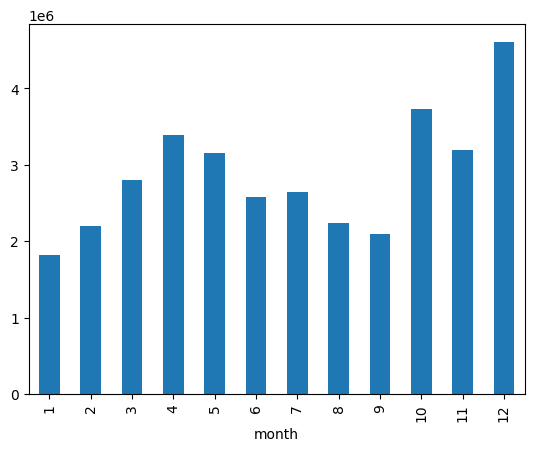

In [53]:
data.groupby(['month'])['sales'].sum().plot(kind='bar')

### Which city has the maximum order ?

In [54]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [56]:
data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [59]:
data['Purchase Address'][0].split(',')[1]

' Dallas'

In [61]:
data['Purchase Address'].str.split(',')

0                    [917 1st St,  Dallas,  TX 75001]
2               [682 Chestnut St,  Boston,  MA 02215]
3            [669 Spruce St,  Los Angeles,  CA 90001]
4            [669 Spruce St,  Los Angeles,  CA 90001]
5               [333 8th St,  Los Angeles,  CA 90001]
                             ...                     
186845     [840 Highland St,  Los Angeles,  CA 90001]
186846    [216 Dogwood St,  San Francisco,  CA 94016]
186847       [220 12th St,  San Francisco,  CA 94016]
186848     [511 Forest St,  San Francisco,  CA 94016]
186849     [250 Meadow St,  San Francisco,  CA 94016]
Name: Purchase Address, Length: 185686, dtype: object

In [64]:
data['city'] = data['Purchase Address'].str.split(',').str.get(1)

In [65]:
pd.value_counts(data['city'])

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

<Axes: ylabel='city'>

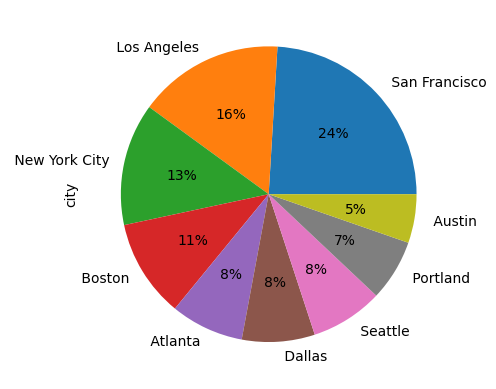

In [66]:
pd.value_counts(data['city']).plot(kind='pie', autopct = '%1.0f%%')

### Which product sold the most and why ?

In [67]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city'],
      dtype='object')

In [70]:
count_df = data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

In [74]:
count_df = count_df.reset_index()

In [76]:
count_df.columns

Index(['Product', 'Quantity Ordered', 'Price Each'], dtype='object')

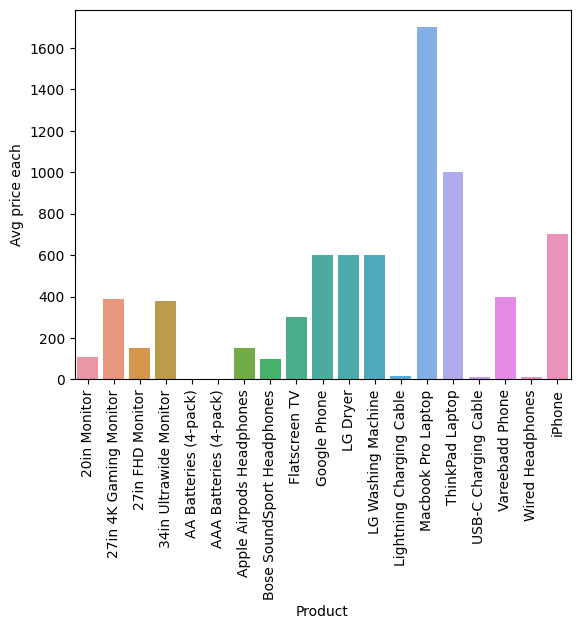

In [93]:
# Avg price per product
sns.barplot(count_df, x="Product", y="Price Each")
plt.xticks(rotation=90)
plt.ylabel("Avg price each")
plt.show()

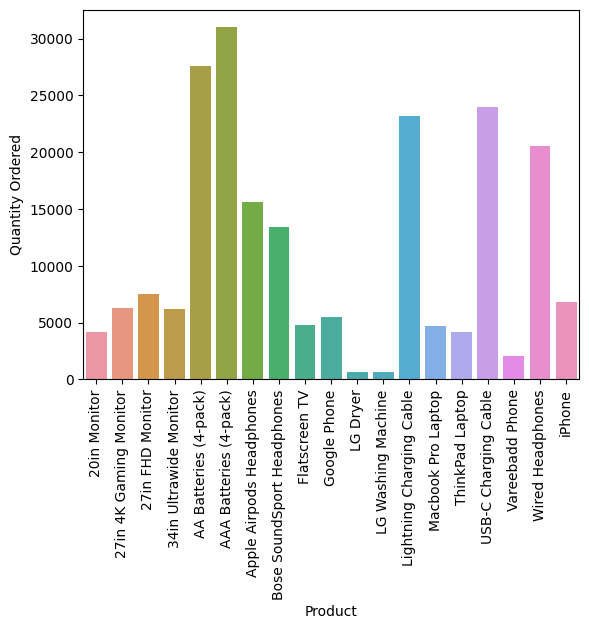

In [94]:
# Quantity Ordered per product
sns.barplot(count_df, x="Product", y="Quantity Ordered")
plt.xticks(rotation=90)
#plt.ylabel("Avg price each")
plt.show()

### Understanding trend of most sold product

In [97]:
data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [98]:
most_sold_products = data['Product'].value_counts()[0:5].index

In [99]:
data['Product'].isin(most_sold_products)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [101]:
most_sold_products_df = data[data['Product'].isin(most_sold_products)]

In [102]:
most_sold_products_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [103]:
most_sold_products_df.groupby(['month','Product']).size()

month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [107]:
pivot = most_sold_products_df.groupby(['month','Product']).size().unstack()

<Axes: xlabel='month'>

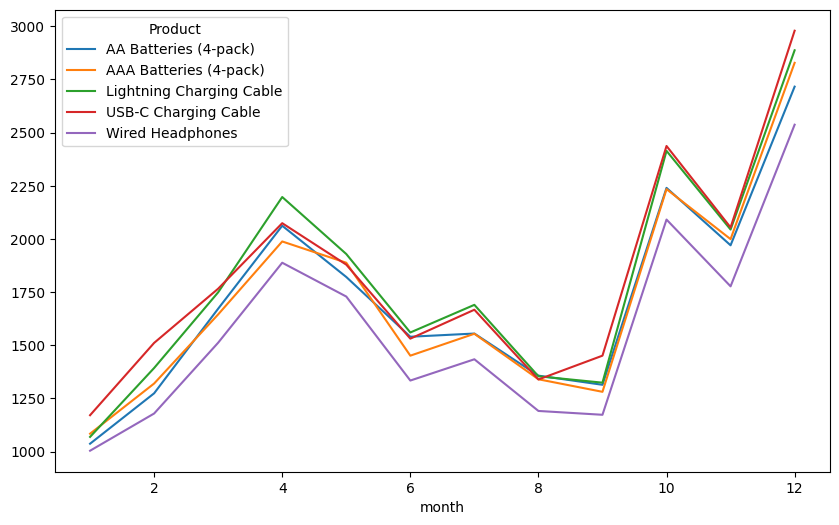

In [109]:
pivot.plot(figsize=(10,6))

### What products most often soled together ?

In [110]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city'],
      dtype='object')

In [111]:
data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [114]:
df_duplicated = data[data['Order ID'].duplicated(keep=False)]

In [115]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [118]:
duplicate_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_product'})

In [119]:
duplicate_products

,Order ID,grouped_product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [121]:
dup_product_df = df_duplicated.merge(duplicate_products, how='left', on='Order ID')

In [122]:
dup_product_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,grouped_product
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [124]:
no_duplicate = dup_product_df.drop_duplicates(subset='Order ID')

In [125]:
no_duplicate

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,grouped_product
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


<Axes: ylabel='grouped_product'>

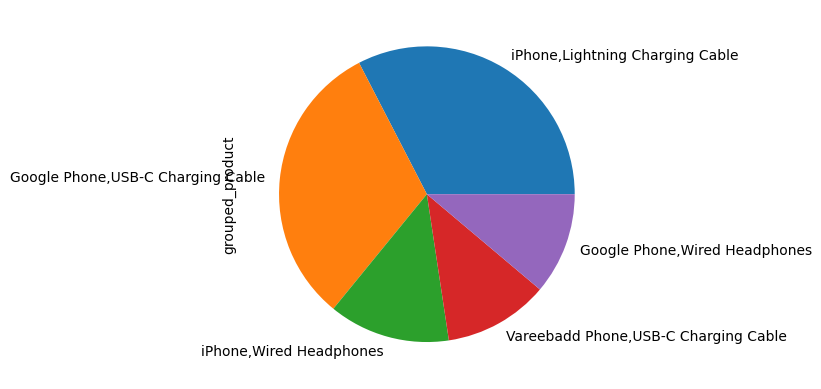

In [127]:
no_duplicate['grouped_product'].value_counts()[0:5].plot.pie()